# **RANDOM FOREST and DECISION TREE**

Para este projeto, estaremos explorando dados disponíveis publicamente de [LendingClub.com](www.lendingclub.com). Lending Club conecta pessoas que precisam de dinheiro (mutuários) com pessoas que têm dinheiro (investidores). Felizmente, como investidor, você gostaria de investir em pessoas que mostraram um perfil de ter uma alta probabilidade de pagá-lo de volta. Vamos tentar criar um modelo que ajude a prever isso.

O clube de empréstimo teve um [ano muito interessante em 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), então vamos verificar alguns de seus dados e ter em mente o contexto. Esses dados são de antes mesmo de serem públicos.

Utilizaremos os dados de empréstimos de 2007-2010 e tentaremos classificar e prever se o mutuário pagou o empréstimo na íntegra. Você pode baixar os dados de [aqui](https://www.lendingclub.com/info/download-data.action) ou apenas usar o csv já fornecido. Recomenda-se que você use o csv fornecido, uma vez que foi limpo dos valores de NA.

Aqui estão o que as colunas representam:
* **credit.policy**: 1 se o cliente atender aos critérios de subscrição de crédito da LendingClub.com e 0 caso contrário.
* **purpose**: O objetivo do empréstimo (leva valores "credit_card", "debt_consolidation", "educacional", "grande compra", "small_business" e "all_other").
* **int.rate**: a taxa de juros do empréstimo (uma taxa de 11% seria armazenada como 0,11). Os mutuários julgados por LendingClub.com para serem mais arriscados recebem taxas de juros mais elevadas.
* **installment**: as parcelas mensais devidas pelo mutuário se o empréstimo for financiado.
* **log.annual.inc**: O log natural da renda anual auto-relatada do mutuário.
* **dti**: Ratio dívida / rendimento do tomador do empréstimo (montante da dívida dividido pela receita anual).
* **fico**: a pontuação de crédito FICO do mutuário.
* **days.with.cr.line**: O número de dias em que o mutuário teve uma linha de crédito.
* **revol.bal**: Saldo rotativo do mutuário (montante não pago no final do ciclo de cobrança do cartão de crédito).
* **revol.util**: taxa de utilização da linha rotativa do mutuário (o valor da linha de crédito usada em relação ao crédito total disponível).
* **inq.last.6mths**: número de consultas do mutuário por credores nos últimos 6 meses.
* **delinq.2yrs**: o número de vezes que o mutuário havia passado mais de 30 dias em um pagamento nos últimos 2 anos.
* **pub.rec**: O número de registros públicos depreciativos do mutuário (arquivamentos de falências, ônus fiscais ou julgamentos).

## **Importar bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## **Data**

In [3]:
from google.colab import files  #biblioteca utilizada para carregar os dados para o google colab
uploaded = files.upload()

Saving loan_data.csv to loan_data.csv


In [4]:
data = pd.read_csv('loan_data.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [23]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [24]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


## **Análise exploratória de dados**

**Crie um histograma de duas distribuições FICO umas sobre as outras, uma para cada um dos valores possíveis de credit.policy.**




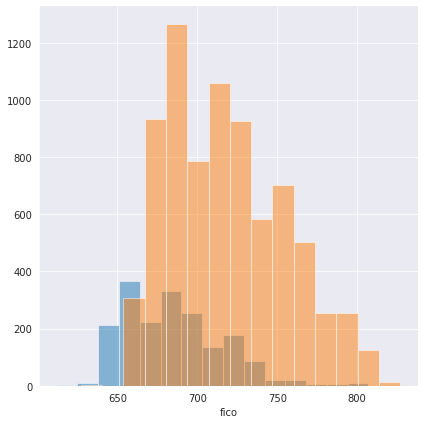

In [8]:
sns.set_style('darkgrid')
g = sns.FacetGrid(data, hue='credit.policy', height=6)
g = g.map(plt.hist, 'fico', bins=15, alpha=0.5)

Text(0.5, 0, 'FICO')

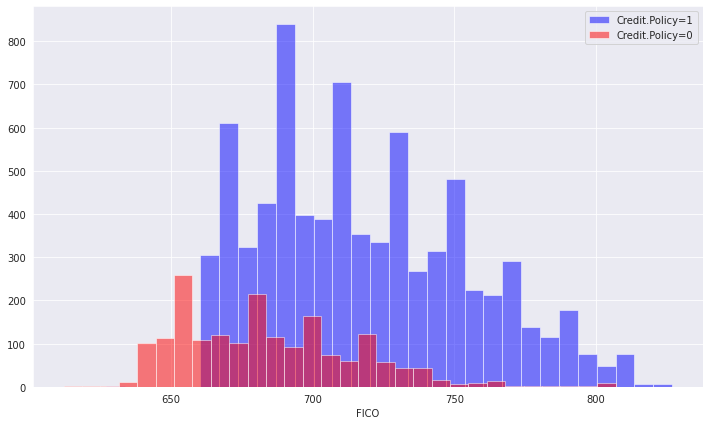

In [16]:
plt.figure(figsize=(12,7))
data[data['credit.policy']==1]['fico'].hist(alpha=0.5, color='blue', bins=30, label='Credit.Policy=1')
data[data['credit.policy']==0]['fico'].hist(alpha=0.5, color='red', bins=30, label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

      Distribuições diferentes. Tem pessoas que tem aderencias as politicas de créditos do club e acabam tendo uma pontuação maior e as que não, 
    mais baixa.

**Crie uma figura semelhante, mas dessa vez use a coluna not.fully.paid.**

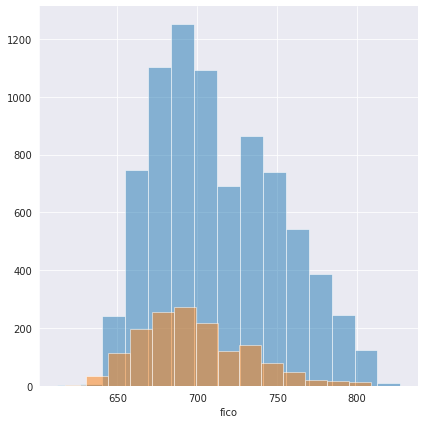

In [9]:
sns.set_style('darkgrid')
g = sns.FacetGrid(data, hue='not.fully.paid', height=6)
g = g.map(plt.hist, 'fico', bins=15, alpha=0.5)

Text(0.5, 0, 'FICO')

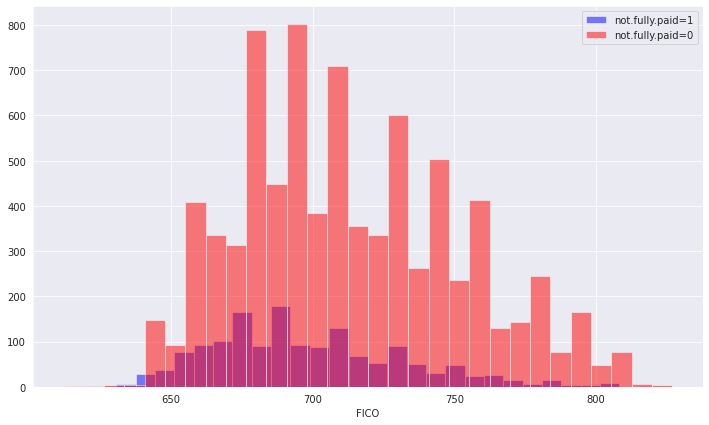

In [18]:
plt.figure(figsize=(12,7))
data[data['not.fully.paid']==1]['fico'].hist(alpha=0.5, color='blue', bins=30, label='not.fully.paid=1')
data[data['not.fully.paid']==0]['fico'].hist(alpha=0.5, color='red', bins=30, label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

    A principio so se altera na contagem. Logo a pontuação da pessoa não é determinante para ver se irá pagar o empréstimo, ou não.

**Crie um countplot usando seaborn mostrando a contagens de empréstimos por finalidade, com a matiz de cor definido por not.fully.paid.**

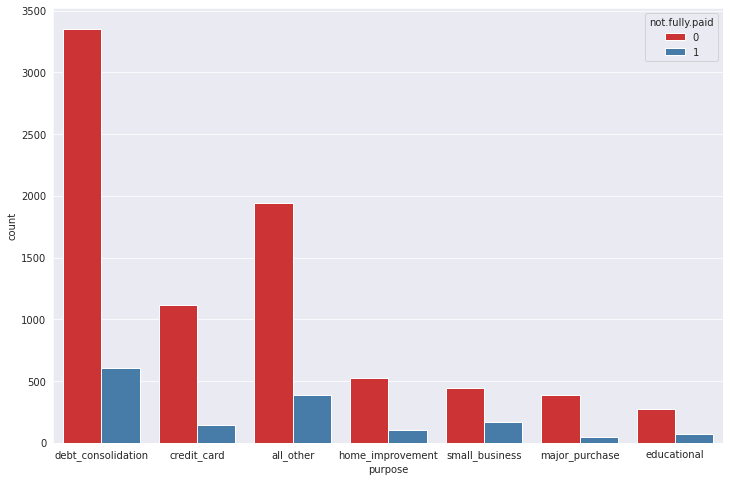

In [19]:
fig = plt.gcf()
fig.set_size_inches(12,8)
# or plt.figure(figsize=(12,7))
sns.countplot(x='purpose', hue='not.fully.paid', data=data, palette='Set1')

**Veja a tendência entre o índice FICO e a taxa de juros. Recrie o seguinte jointplot.**

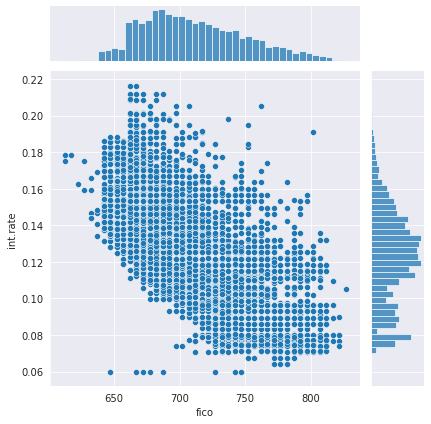

In [30]:
sns.jointplot(x='fico', y='int.rate', data=data)

**Crie os seguintes lmplots para ver se a tendência diferiu entre not.fully.paid e credit.policy.**

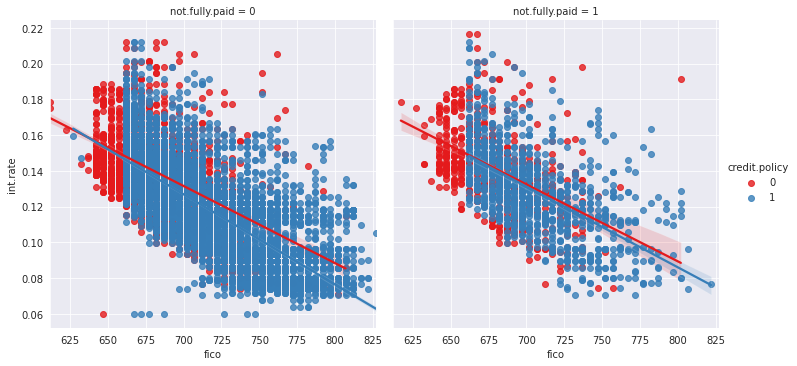

In [20]:
sns.lmplot(x='fico', y='int.rate', col='not.fully.paid', hue='credit.policy', data=data, palette='Set1')

# **Configurando os Dados**


In [21]:
data['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

## **Recursos Categóricos**

Observe a coluna **purpose** como categórica.

Isso significa que precisamos transformá-los usando variáveis dummys para que Sklearn possa compreendê-las. Vamos fazer isso em um passo limpo usando pd.get_dummies.

Vamos mostrar uma maneira de lidar com essas colunas que podem ser expandidas para múltiplos parâmetros categóricos, se necessário.

**Crie uma lista de 1 elemento contendo a string 'purpose'. Chame esta lista de cat_feats.**

In [22]:
cat_feats = ['purpose']

**Agora use "pd.get_dummies(loans, columns = cat_feats, drop_first = True)" para criar um DataFrame maior fixo que tenha novas colunas de recursos com variáveis dummy. Chame este dataframe de final_data.**

In [23]:
final_data = pd.get_dummies(data, columns=cat_feats, drop_first=True)

In [24]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

## **Divisão Treino-Teste de Dados**

**Use sklearn para dividir seus dados em um conjunto de treinamento e um conjunto de testes como fizemos no passado.**

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

## **Training a Decision Tree Model**

Vamos começar treinando uma única árvore de decisão primeiro!

**Import DecisionTreeClassifier**

In [28]:
from sklearn.tree import DecisionTreeClassifier

**Crie uma instância de DecisionTreeClassifier() chamada dtree e fite-a com os dados de treinamento.**

In [29]:
dtree = DecisionTreeClassifier()

In [30]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## **Previsões e Avaliação da árvore de decisão**
**Faça previsões do conjunto de teste e crie um relatório de classificação e uma matriz de confusão.**

In [31]:
predict = dtree.predict(X_test)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
print(classification_report(y_test, predict))
print(confusion_matrix(y_test, predict))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      2666
           1       0.19      0.23      0.21       495

    accuracy                           0.73      3161
   macro avg       0.52      0.53      0.52      3161
weighted avg       0.75      0.73      0.74      3161

[[2178  488]
 [ 379  116]]


    Olhando pela precisão só foi boa quando previu as pessoas que pagariam (0.85) seus débitos, pois a maioria das pessoas pagavam seus débitos.

## **Treinando o modelo de florestas aleatórias**

**Crie uma instância da classe RandomForestClassifier e ajuste-a aos nossos dados de treinamento da etapa anterior.**

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier (n_estimators=500)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## **Previsões e Avaliação**

Vamos prever os valores do y_test e avaliar o nosso modelo.

**Preveja a classe de not.fully.paid para os dados X_test.**

In [41]:
rfc_pred = rfc.predict(X_test)

**Agora crie um relatório de classificação dos resultados. Você recebe algo estranho ou algum tipo de aviso?**

In [43]:
print(confusion_matrix(y_test, rfc_pred))

[[2657    9]
 [ 487    8]]


In [44]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.91      2666
           1       0.47      0.02      0.03       495

    accuracy                           0.84      3161
   macro avg       0.66      0.51      0.47      3161
weighted avg       0.79      0.84      0.78      3161



**O que performou melhor: a floresta aleatória ou a árvore de decisão?**

    Podemos ver que o modelo performou muito mal sobre o recall, dado quando o cliente não pagou seus créditos, apenas 2%.
    Previu em maioria dos que somente pagaram.
    O modelo da RandomForest performou pior do que o de Arvore de Decisão, mas este tende a ser melhor.